## 텍스트 생성

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

import urllib

In [2]:
# irish-lyrics-eof.txt 데이터셋 파일 다운로드 , Windows용
url = 'https://github.com/aaBadri/nlp-tf/blob/master/irish-lyrics-eof.txt'
urllib.request.urlretrieve(url, 'irish-lyrics-eof.txt')

('irish-lyrics-eof.txt', <http.client.HTTPMessage at 0x22d75fa3d30>)

In [11]:
# 토큰화
tokenizer = Tokenizer()

data = open('irish-lyrics-eof.txt').read()

corpus = data.lower().split('\n')

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
# print(tokenizer.wor//d_index)
print(total_words)  # 2690

2690


In [12]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len,
                                         padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)  # 원핫 인코딩

In [13]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', 
              optimizer=adam,
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 100)           269000    
                                                                 
 bidirectional (Bidirectiona  (None, 300)              301200    
 l)                                                              
                                                                 
 dense (Dense)               (None, 2690)              809690    
                                                                 
Total params: 1,379,890
Trainable params: 1,379,890
Non-trainable params: 0
_________________________________________________________________


In [14]:
# 학습
history = model.fit(xs, ys, epochs=10, verbose=1)
print(model)

Epoch 1/10
377/377 [==============================] - 11s 10ms/step - loss: 6.5989 - accuracy: 0.0754
Epoch 2/10
377/377 [==============================] - 3s 9ms/step - loss: 5.6308 - accuracy: 0.1261
Epoch 3/10
377/377 [==============================] - 3s 9ms/step - loss: 4.6645 - accuracy: 0.1764
Epoch 4/10
377/377 [==============================] - 3s 9ms/step - loss: 3.7173 - accuracy: 0.2606
Epoch 5/10
377/377 [==============================] - 3s 9ms/step - loss: 2.9138 - accuracy: 0.3658
Epoch 6/10
377/377 [==============================] - 3s 9ms/step - loss: 2.2857 - accuracy: 0.4727
Epoch 7/10
377/377 [==============================] - 3s 9ms/step - loss: 1.8387 - accuracy: 0.5681
Epoch 8/10
377/377 [==============================] - 3s 9ms/step - loss: 1.5253 - accuracy: 0.6336
Epoch 9/10
377/377 [==============================] - 3s 9ms/step - loss: 1.3014 - accuracy: 0.6850
Epoch 10/10
377/377 [==============================] - 3s 9ms/step - loss: 1.2086 - accuracy: 0.70

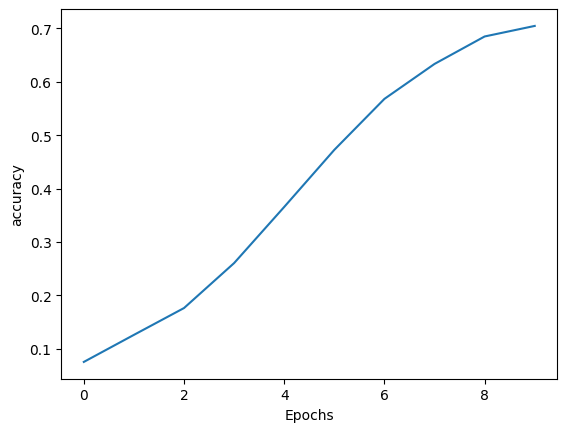

In [16]:
# 시각화
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()
    
plot_graphs(history, 'accuracy')

In [17]:
# 텍스트(문장) 생성
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = tf.argmax(model.predict(token_list, verbose=0),axis=1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

I've got a bad feeling about this by day and by night but the wearin o their eyes fearless and gone and by night unseen gone by and sinking eyes well gone and heavy began to immortal love to me my bride now gone but always did seen gone by the rest from a new love on your brow away oer the moor arms i had bring me gone and now he begged for forgiveness today sinking darlin sportin jenny tune ive never she sighed as me would her lover do gone by arms by lord cornwall the warm wall kind and immortal ever i had i
